### Description

- This code preprocesses data to fit them into machine learning models.
- It splits feature (i.e., data from nearby stations) and target data (i.e., data from the target station).
- It changes the granuality of data from hours to days
  - Reason 1: Reduce the number of rows
  - Resaon 2: Reduce the number of missing values
  - Reason 3: Enable the one day ahead prediction
- It also fills missing values using spline interpolation.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os
import glob
import re
import matplotlib.pyplot as plt
from scipy import signal
import statsmodels.api as sm
import datetime

### Reading csv files

In [9]:
# Reading files
data_dir = r'Data/Source/output'
all_files = glob.glob(data_dir + '/*.csv')

all_files

['Data/Source/output/Temecula.csv',
 'Data/Source/output/Upland.csv',
 'Data/Source/output/Central_LA.csv',
 'Data/Source/output/Lake_Elsinore.csv',
 'Data/Source/output/Glendora.csv',
 'Data/Source/output/Reseda.csv',
 'Data/Source/output/Santa_Clarita.csv',
 'Data/Source/output/Banning.csv',
 'Data/Source/output/Mira_Loma.csv',
 'Data/Source/output/Central_San_Bernardino.csv']

### Target station's data

In [12]:
# Target station: Mira Loma
# Determined based on geographical information
# --> Whether there are enough nearby stations
target_file = r'Data/Source/output/Mira_Loma.csv'
df_target = pd.read_csv(target_file, on_bad_lines='skip')
df_target

,Date Time,Site Name,CO,O3,WD,T,NO2,PM25,WS
0,2017-01-17 10:00:00,Mira Loma,0.2,19.0,163.3,60.2,18.0,8,1.7
1,2017-01-17 12:00:00,Mira Loma,0.0,0.0,337.0,65.3,0.0,5,3.9
2,2017-01-17 13:00:00,Mira Loma,0.0,0.0,282.4,65.6,0.0,6,6.7
3,2017-01-17 14:00:00,Mira Loma,0.0,0.0,275.7,66.5,0.0,9,5.9
4,2017-01-17 15:00:00,Mira Loma,0.0,0.0,276.0,66.6,0.0,11,6.1
...,...,...,...,...,...,...,...,...,...
44224,2022-06-30 19:00:00,Mira Loma,0.0,42.0,261.0,79.0,5.0,5,4.0
44225,2022-06-30 20:00:00,Mira Loma,0.0,32.0,251.0,76.0,8.0,13,3.0
44226,2022-06-30 21:00:00,Mira Loma,0.0,29.0,239.0,74.0,8.0,10,3.0
44227,2022-06-30 22:00:00,Mira Loma,0.0,26.0,260.0,72.0,9.0,13,2.0


In [13]:
# Change the data from hourly based to daily based one
# Reason 1: Reduce the number of rows
# Resaon 2: Reduce the number of missing values
# Reason 3: Enable the one day ahead prediction
df_target['Date Time'] = pd.to_datetime(df_target['Date Time'])
df_target = df_target.set_index('Date Time')

df_target_re = df_target.resample('1h').mean()
df_target_re

,CO,O3,WD,T,NO2,PM25,WS
Date Time,,,,,,,
2017-01-17 10:00:00,0.2,19.0,163.3,60.2,18.0,8.0,1.7
2017-01-17 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-17 12:00:00,0.0,0.0,337.0,65.3,0.0,5.0,3.9
2017-01-17 13:00:00,0.0,0.0,282.4,65.6,0.0,6.0,6.7
2017-01-17 14:00:00,0.0,0.0,275.7,66.5,0.0,9.0,5.9
...,...,...,...,...,...,...,...
2022-06-30 19:00:00,0.0,42.0,261.0,79.0,5.0,5.0,4.0
2022-06-30 20:00:00,0.0,32.0,251.0,76.0,8.0,13.0,3.0
2022-06-30 21:00:00,0.0,29.0,239.0,74.0,8.0,10.0,3.0


### Checking missing values (Target station's data)

Column name: CO
Number of entries: 47774
Number of null entries: 3545

Descriptive statistics
count    44229.000000
mean         0.092212
std          0.227574
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.070000
max          2.560000
Name: CO, dtype: float64

Plotting the time series


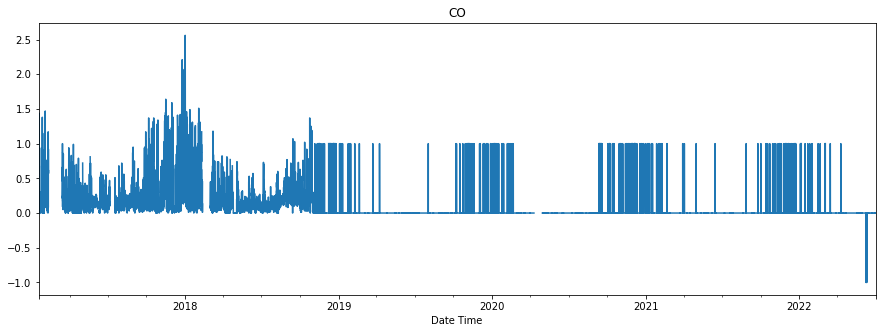



Column name: O3
Number of entries: 47774
Number of null entries: 3545

Descriptive statistics
count    44229.000000
mean        31.184223
std         23.400374
min         -1.000000
25%         11.000000
50%         30.000000
75%         45.000000
max        145.000000
Name: O3, dtype: float64

Plotting the time series


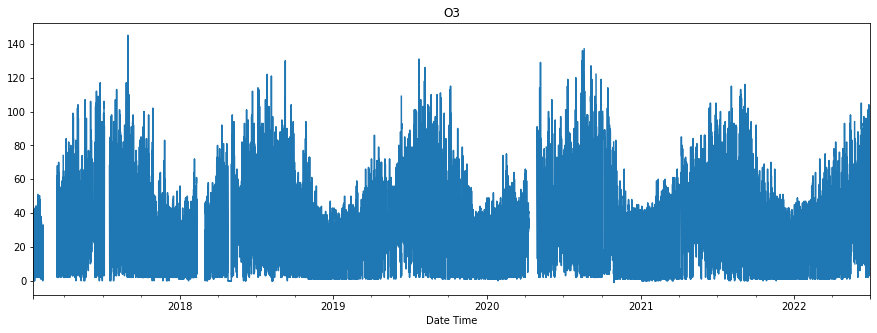



Column name: WD
Number of entries: 47774
Number of null entries: 3545

Descriptive statistics
count    44229.000000
mean       204.027812
std         87.231165
min          0.000000
25%        137.000000
50%        243.000000
75%        265.000000
max        359.800000
Name: WD, dtype: float64

Plotting the time series


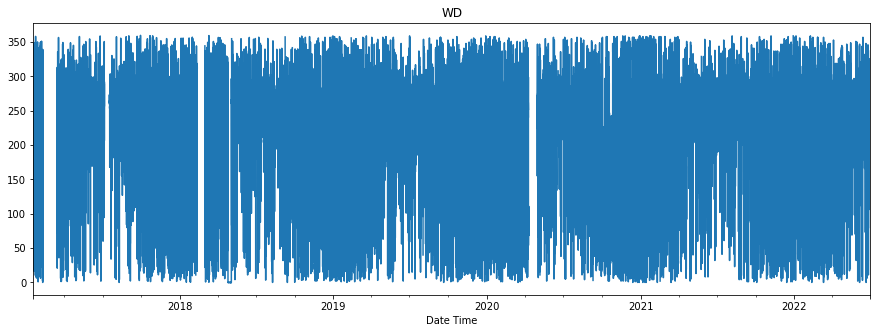



Column name: T
Number of entries: 47774
Number of null entries: 3545

Descriptive statistics
count    44229.000000
mean        65.731353
std         13.608849
min          0.000000
25%         57.000000
50%         64.500000
75%         74.000000
max        114.600000
Name: T, dtype: float64

Plotting the time series


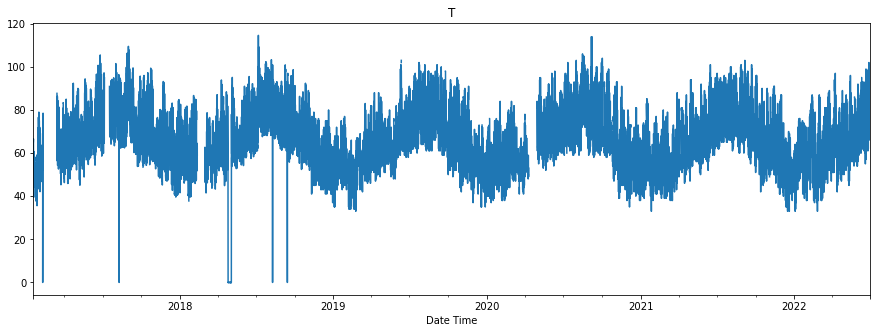



Column name: NO2
Number of entries: 47774
Number of null entries: 3545

Descriptive statistics
count    44229.000000
mean        12.004499
std          9.891779
min         -1.000000
25%          4.000000
50%          9.000000
75%         18.000000
max         65.000000
Name: NO2, dtype: float64

Plotting the time series


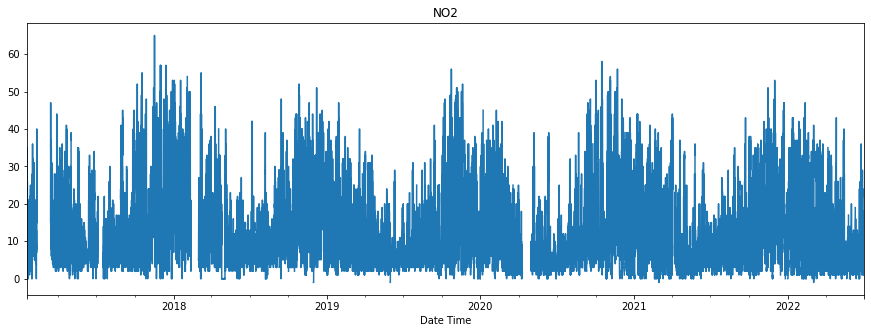



Column name: PM25
Number of entries: 47774
Number of null entries: 3545

Descriptive statistics
count    44229.000000
mean        15.022994
std         17.579801
min         -5.000000
25%          8.000000
50%         13.000000
75%         19.000000
max        987.000000
Name: PM25, dtype: float64

Plotting the time series


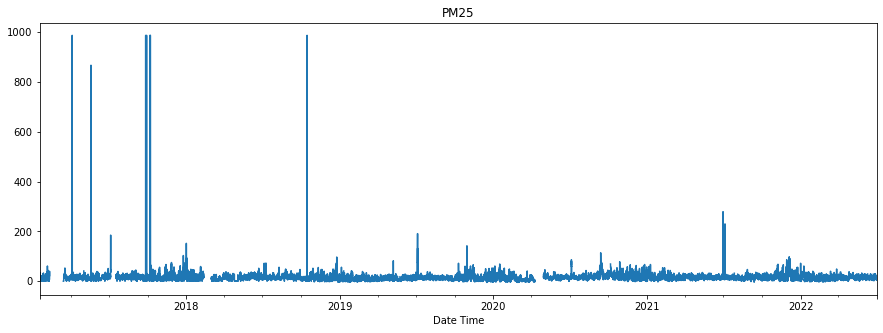



Column name: WS
Number of entries: 47774
Number of null entries: 3545

Descriptive statistics
count    44229.000000
mean         4.103538
std          4.166481
min          0.000000
25%          1.000000
50%          3.000000
75%          6.000000
max         30.000000
Name: WS, dtype: float64

Plotting the time series


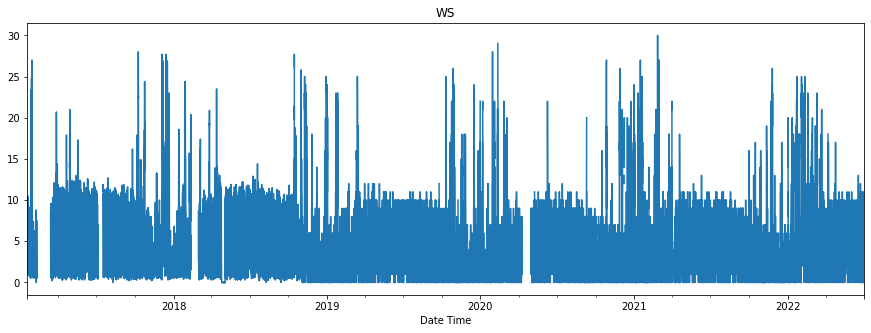

In [14]:
for col in df_target_re.columns:
  print(f'Column name: {col}')
  print(f'Number of entries: {len(df_target_re[col])}')
  print(f'Number of null entries: {len(df_target_re[pd.isnull(df_target_re[col])])}')
  print()
  print('Descriptive statistics')
  print(df_target_re[col].describe().T)
  print()
  print('Plotting the time series')
  df_target_re[col].plot(title=col, figsize=(15, 5))
  plt.show()
  print()
  print()

In [15]:
# Missing values
missing_df = df_target_re[pd.isnull(df_target_re['PM25'])]
unique, counts = np.unique(missing_df.index.year, return_counts=True)
print(pd.DataFrame(np.asarray((unique, counts)).T, columns=['Year', 'Missing value no']))

   Year  Missing value no
0  2017              1204
1  2018               687
2  2019               267
3  2020               893
4  2021               337
5  2022               157


### Nearby stations' data

Station name: Temecula
Number of entries: 15925
Number of null entries: 811

Descriptive statistics
count    15114.000000
mean         8.544936
std         10.349220
min         -2.000000
25%          4.666667
50%          7.666667
75%         11.000000
max        503.500000
Name: PM25, dtype: float64

Plotting the time series


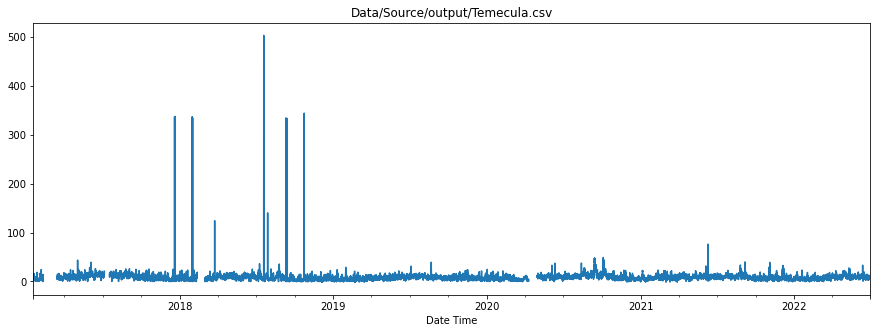


   Year  Missing value no
0  2017               386
1  2018               172
2  2019                32
3  2020               192
4  2021                12
5  2022                17


Station name: Upland
Number of entries: 15925
Number of null entries: 1278

Descriptive statistics
count    14647.000000
mean        12.488610
std         10.557826
min         -4.000000
25%          5.666667
50%         11.000000
75%         17.333333
max        354.333333
Name: PM25, dtype: float64

Plotting the time series


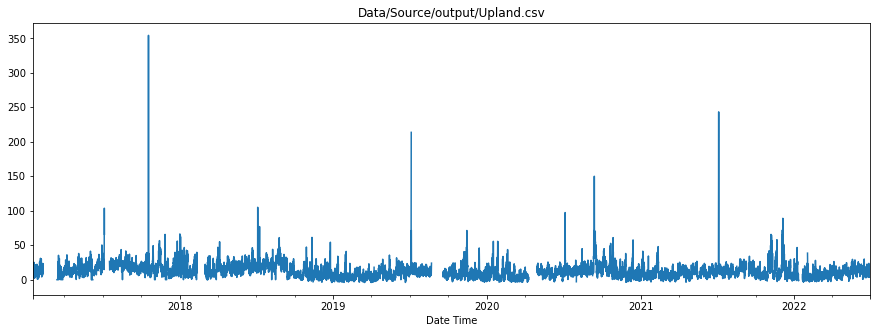


   Year  Missing value no
0  2017               386
1  2018               175
2  2019               277
3  2020               201
4  2021               144
5  2022                95


Station name: Central_LA
Number of entries: 15925
Number of null entries: 5002

Descriptive statistics
count    10923.000000
mean        13.648036
std         11.840843
min         -4.000000
25%          8.000000
50%         12.333333
75%         17.000000
max        541.000000
Name: PM25, dtype: float64

Plotting the time series


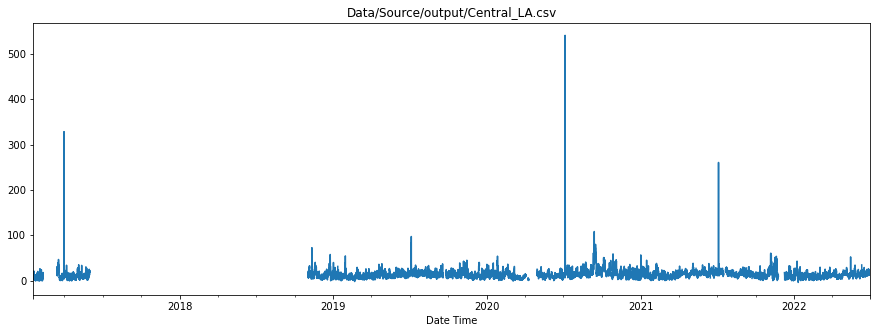


   Year  Missing value no
0  2017              1986
1  2018              2437
2  2019                90
3  2020               232
4  2021               238
5  2022                19


Station name: Lake_Elsinore
Number of entries: 15925
Number of null entries: 1665

Descriptive statistics
count    14260.000000
mean         6.966667
std          8.999275
min         -5.000000
25%          2.000000
50%          6.000000
75%         10.333333
max        342.333333
Name: PM25, dtype: float64

Plotting the time series


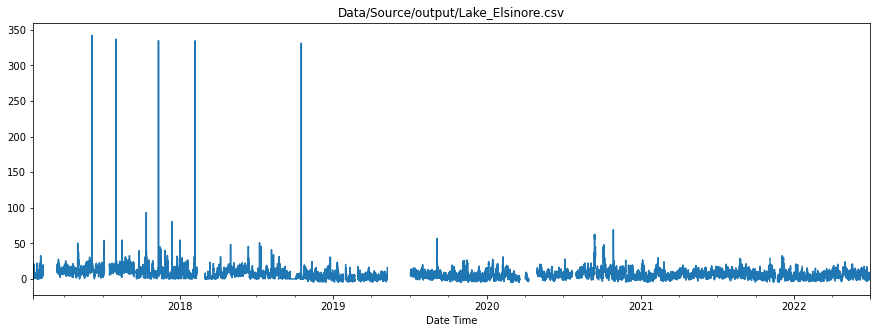


   Year  Missing value no
0  2017               386
1  2018               171
2  2019               557
3  2020               383
4  2021               132
5  2022                36


Station name: Glendora
Number of entries: 15925
Number of null entries: 5528

Descriptive statistics
count    10397.000000
mean        12.419929
std         15.778506
min         -4.000000
25%          6.666667
50%         10.666667
75%         15.333333
max        664.666667
Name: PM25, dtype: float64

Plotting the time series


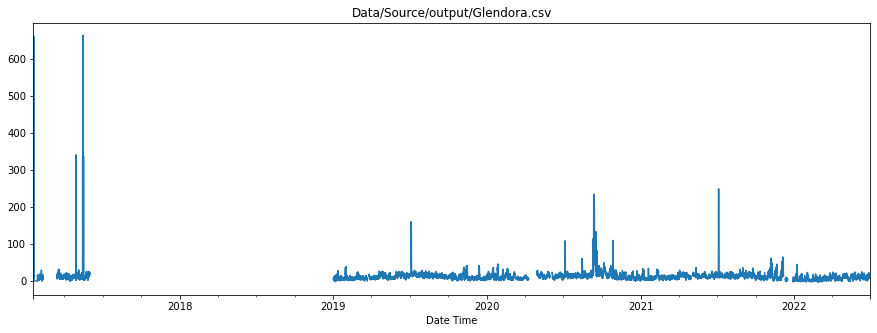


   Year  Missing value no
0  2017              1986
1  2018              2920
2  2019               104
3  2020               266
4  2021               214
5  2022                38


Station name: Reseda
Number of entries: 10756
Number of null entries: 480

Descriptive statistics
count    10276.000000
mean        11.585572
std          8.799341
min         -3.500000
25%          6.000000
50%         10.333333
75%         15.000000
max        259.000000
Name: PM25, dtype: float64

Plotting the time series


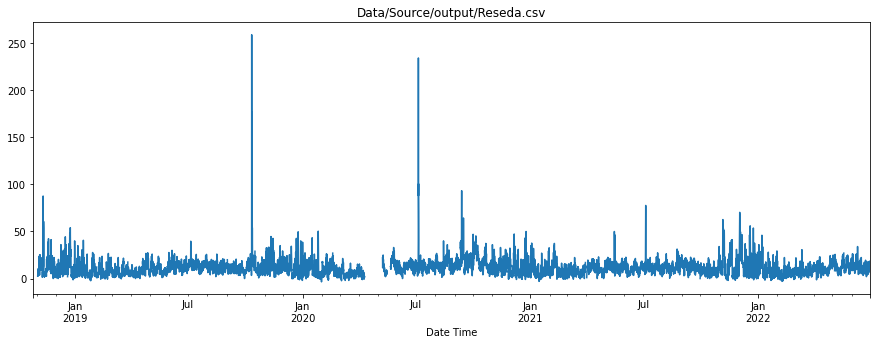


   Year  Missing value no
0  2018                57
1  2019                47
2  2020               308
3  2021                47
4  2022                21


Station name: Santa_Clarita
Number of entries: 15925
Number of null entries: 4842

Descriptive statistics
count    11083.000000
mean         8.497714
std          8.035190
min         -5.000000
25%          3.333333
50%          7.333333
75%         12.333333
max        332.000000
Name: PM25, dtype: float64

Plotting the time series


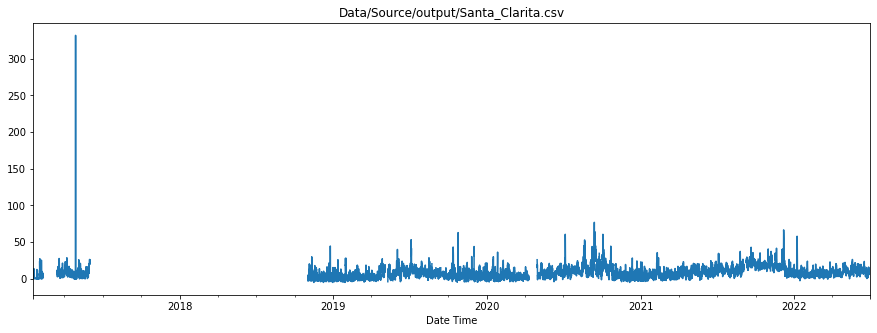


   Year  Missing value no
0  2017              1986
1  2018              2438
2  2019               132
3  2020               199
4  2021                63
5  2022                24


Station name: Banning
Number of entries: 15925
Number of null entries: 995

Descriptive statistics
count    14930.000000
mean         9.919636
std          9.347790
min         -3.666667
25%          5.000000
50%          8.666667
75%         13.333333
max        338.000000
Name: PM25, dtype: float64

Plotting the time series


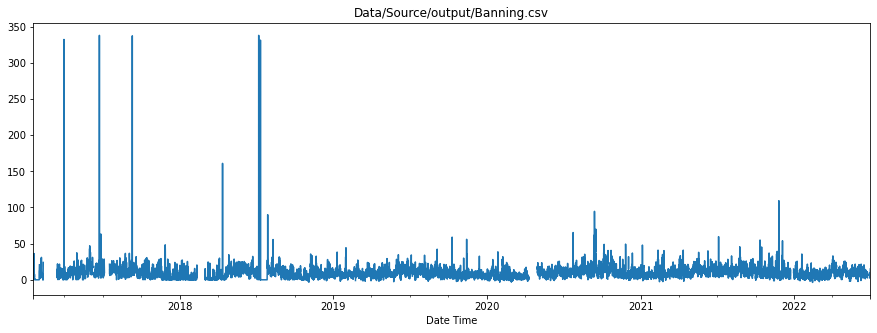


   Year  Missing value no
0  2017               386
1  2018               184
2  2019                53
3  2020               189
4  2021               118
5  2022                65


Station name: Central_San_Bernardino
Number of entries: 15204
Number of null entries: 1159

Descriptive statistics
count    14045.000000
mean         8.705115
std         12.053073
min        -12.666667
25%          4.000000
50%          7.333333
75%         11.666667
max        665.666667
Name: PM25, dtype: float64

Plotting the time series


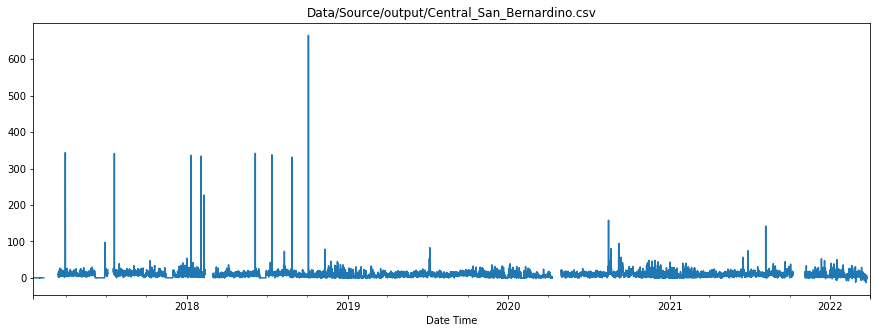


   Year  Missing value no
0  2017               386
1  2018               173
2  2019                90
3  2020               195
4  2021               237
5  2022                78




In [16]:
for f in all_files:
  if f == 'Data/Source/output/Mira_Loma.csv':
    continue
  
  df_nearby = pd.read_csv(f, on_bad_lines='skip')
  df_nearby['Date Time'] = pd.to_datetime(df_nearby['Date Time'])
  df_nearby = df_nearby.set_index('Date Time')

  df_nearby_re = df_nearby.resample('3h').mean()

  print(f"Station name: {f.split('/')[-1].split('.')[0]}")
  print(f'Number of entries: {len(df_nearby_re["PM25"])}')
  print(f'Number of null entries: {len(df_nearby_re[pd.isnull(df_nearby_re["PM25"])])}')
  print()
  print('Descriptive statistics')
  print(df_nearby_re["PM25"].describe().T)
  print()
  print('Plotting the time series')
  df_nearby_re["PM25"].plot(title=f, figsize=(15, 5))
  plt.show()
  print()
  missing_df = df_nearby_re[pd.isnull(df_nearby_re['PM25'])]
  unique, counts = np.unique(missing_df.index.year, return_counts=True)
  print(pd.DataFrame(np.asarray((unique, counts)).T, columns=['Year', 'Missing value no']))
  print()
  print()

In [17]:
# List of nearby stations and target station
nearby_stations = ['Upland', 'Lake_Elsinore', 'Temecula', 'Banning', 'Central_San_Bernardino']
target_station = ['Mira_Loma']

### Handle missing values & Split train and test dataset

In [18]:
# nearby stations are selected based on their proximity to target station and the availability of PM25 data
nearby_stations = ['Upland', 'Lake_Elsinore', 'Temecula', 'Banning', 'Central_San_Bernardino']
target_station = ['Mira_Loma']

# Resample size
re_size = '1h'

In [26]:
# Target station
df_target = pd.read_csv(r'Data/Source/output/Mira_Loma.csv', on_bad_lines='skip')
df_target['Date Time'] = pd.to_datetime(df_target['Date Time'])
df_target = df_target.set_index('Date Time')
df_target_re = df_target.resample(re_size).mean()

In [27]:
# Nearby station
cnt = 0
for f in all_files:
  station = f.split('/')[-1].split('.')[0]

  if station in nearby_stations:
    tmp = pd.read_csv(f, on_bad_lines='skip')
    tmp['Date Time'] = pd.to_datetime(tmp['Date Time'])
    tmp = tmp.set_index('Date Time')
    tmp_re = tmp.resample(re_size).mean()

    if cnt==0:
      df_nearby_re = pd.DataFrame(tmp_re['PM25']).rename(columns={'PM25':station + '_PM25'})
    else:
      df_nearby_re = pd.merge(df_nearby_re, pd.DataFrame(tmp_re['PM25']).rename(columns={'PM25':station + '_PM25'}), left_index=True, right_index=True, how='outer')
    cnt+=1

In [29]:
# Combining target and nearby station
df = pd.merge(df_target_re, df_nearby_re, left_index=True, right_index=True, how='outer')
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CO,44229.0,0.092212,0.227574,-1.0,0.0,0.0,0.07,2.56
O3,44229.0,31.184223,23.400374,-1.0,11.0,30.0,45.00,145.00
WD,44229.0,204.027812,87.231165,0.0,137.0,243.0,265.00,359.80
T,44229.0,65.731353,13.608849,0.0,57.0,64.5,74.00,114.60
NO2,44229.0,12.004499,9.891779,-1.0,4.0,9.0,18.00,65.00
PM25,44229.0,15.022994,17.579801,-5.0,8.0,13.0,19.00,987.00
WS,44229.0,4.103538,4.166481,0.0,1.0,3.0,6.00,30.00
Temecula_PM25,44593.0,8.537977,15.921524,-2.0,5.0,8.0,11.00,995.00
Upland_PM25,43241.0,12.480632,11.681589,-5.0,6.0,11.0,18.00,995.00
Lake_Elsinore_PM25,41773.0,6.999952,12.912893,-5.0,2.0,6.0,10.00,993.00


In [30]:
# Handling minus values
# Because of inaccurate calibration, there could be minus values
# So we decided to make the minimum value zero by subtracting the minimum value to every value 
df = df - df.min()

# Handling missing value
# Using interpoltion with option spline
df = df.interpolate(option='spline')

df.describe().T

,count,mean,std,min,25%,50%,75%,max
CO,47774.0,1.097541,0.226561,0.0,1.0,1.000000,1.090000,3.56
O3,47774.0,32.804182,23.408177,0.0,13.0,31.197222,46.598649,146.00
WD,47774.0,203.988127,86.107931,0.0,139.0,241.904167,265.000000,359.80
T,47774.0,65.968631,13.620247,0.0,57.0,65.000000,74.700000,114.60
NO2,47774.0,13.024448,9.737974,0.0,5.0,10.000000,18.000000,66.00
PM25,47774.0,20.205802,17.168653,0.0,13.0,18.000000,25.000000,992.00
WS,47774.0,4.156404,4.105882,0.0,1.0,3.000000,6.000000,30.00
Temecula_PM25,47774.0,10.693923,15.627717,0.0,7.0,10.000000,13.000000,997.00
Upland_PM25,47774.0,17.653378,11.739293,0.0,11.0,16.000000,23.000000,1000.00
Lake_Elsinore_PM25,47774.0,12.126669,12.288732,0.0,7.0,11.000000,15.500000,998.00


First date: 2017-01-17 10:00:00
Last date: 2022-06-30 23:00:00


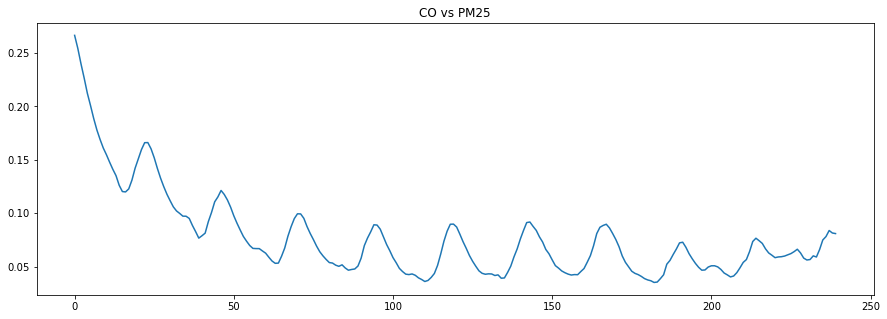

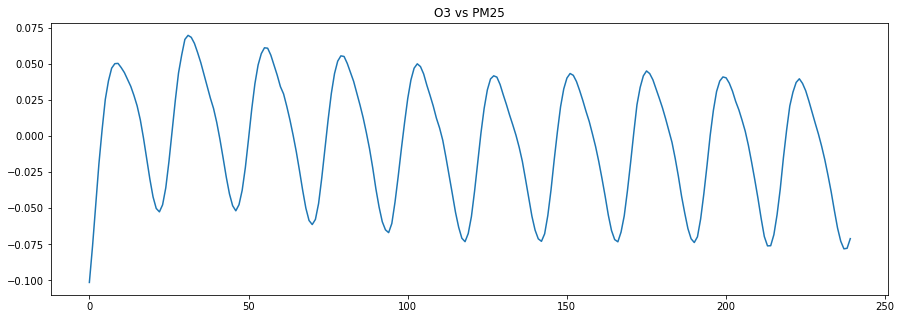

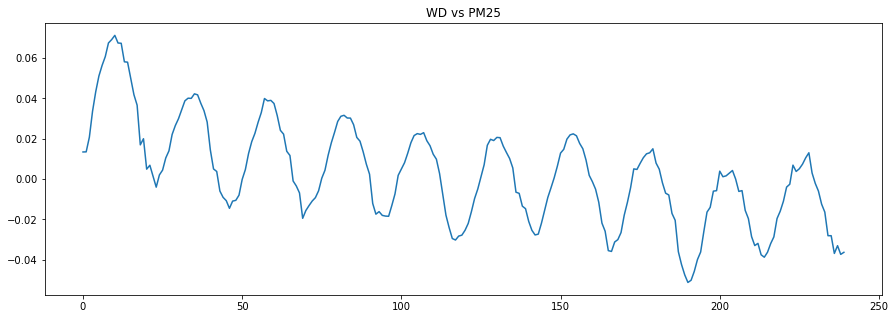

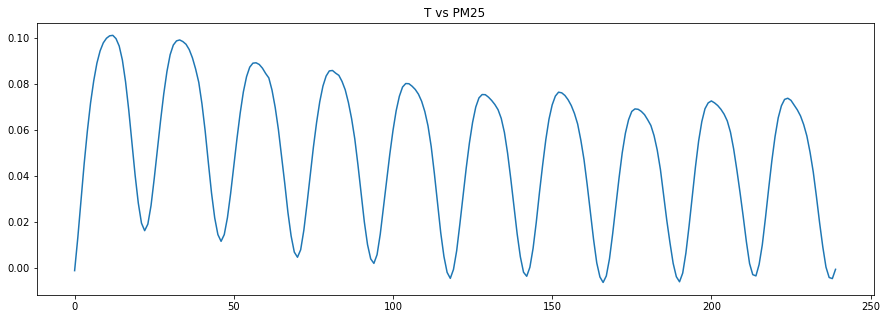

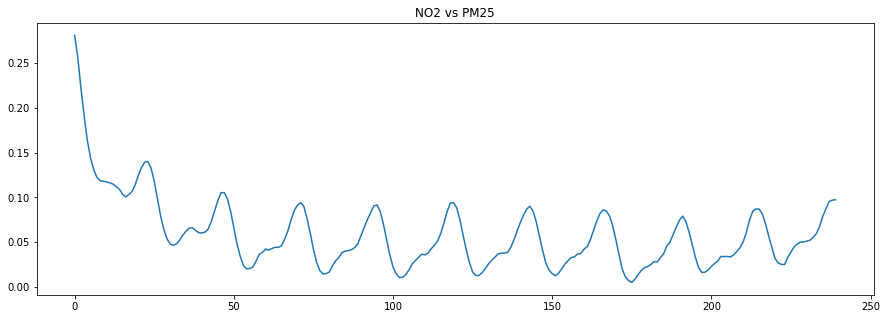

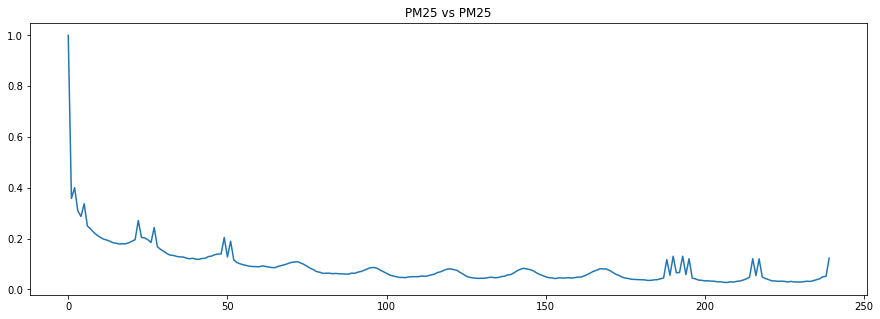

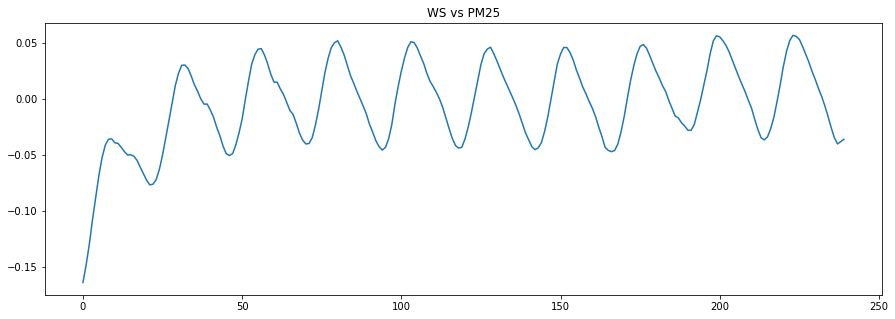

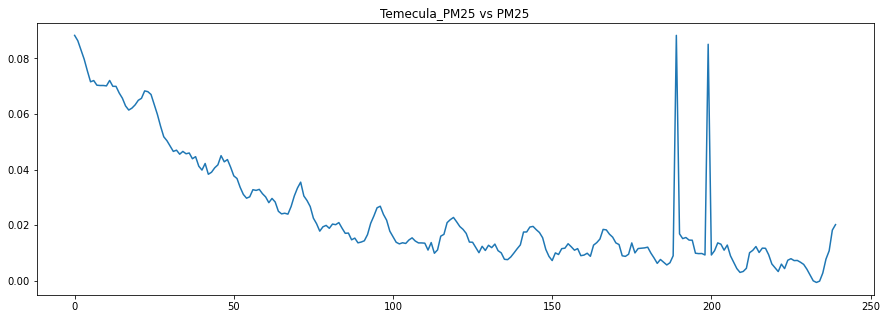

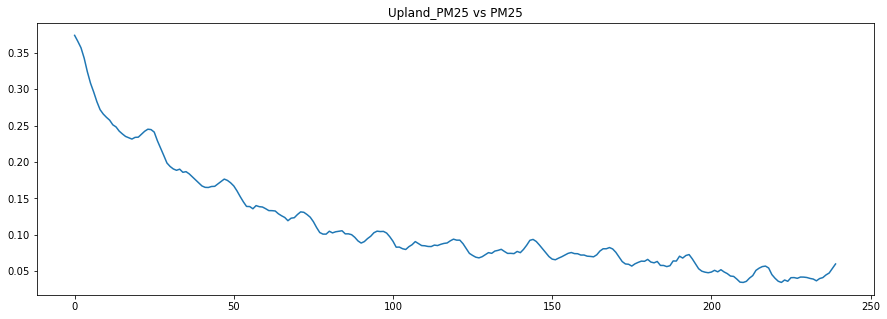

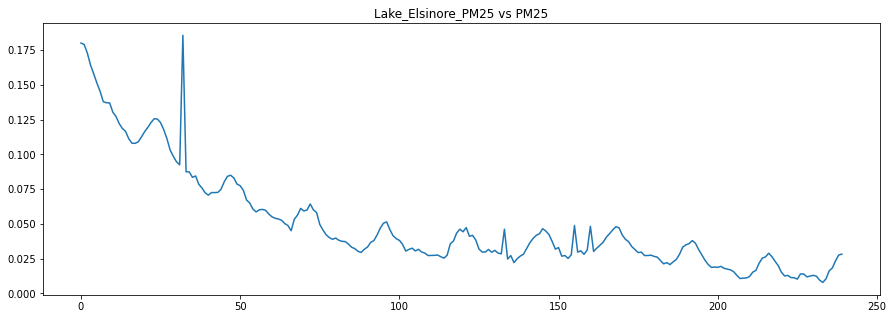

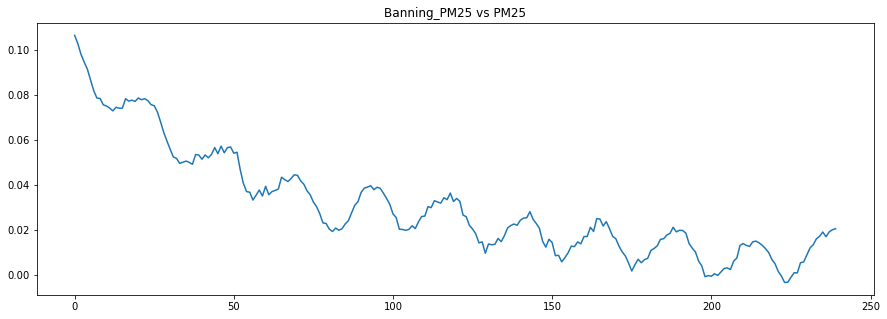

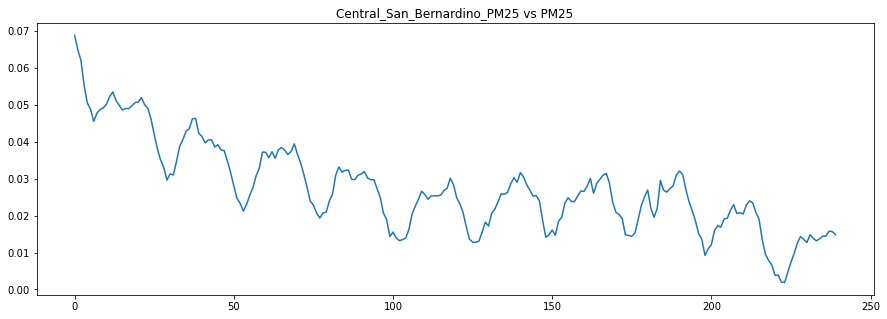

In [31]:
# Determine the past_step & future_step
print(f'First date: {df.index.min()}')
print(f'Last date: {df.index.max()}')

# Cross correlation
for col in df.columns:
  plt.figure(figsize=(15, 5))
  plt.title(col + ' vs PM25')
  plt.plot(sm.tsa.stattools.ccf(df[col], df['PM25'], adjusted=False)[0:240])
  plt.show()

In [32]:
# Train: 2017/01/17 > 2021/01/16 - (future step) 
# Test: 2021/01/17 > 2022/01/16
# To avoid data leakage in test data set, we subtract the period that overlaps from train data set
future_step = 6 # predicting next day data (24X1)
past_step = 168 # using past 7days data (24X7)

train_start = datetime.datetime(2017, 1, 17, 10)
test_start = datetime.datetime(2021, 1, 17, 10)
train_end = test_start - datetime.timedelta(hours=future_step + past_step)
test_end = datetime.datetime(2022, 1, 16, 10)

XTrain = df.loc[df.index<train_end, df.columns!='PM25']
XTrain_PM25 = df.loc[df.index<train_end, :]
yTrain = df.loc[(df.index>=train_start+datetime.timedelta(hours=past_step + future_step)) & (df.index<=train_end+datetime.timedelta(hours=future_step)), df.columns=='PM25']

XTest = df.loc[(df.index>=test_start)&(df.index<test_end-datetime.timedelta(hours=future_step)), df.columns!='PM25']
XTest_PM25 = df.loc[(df.index>=test_start)&(df.index<test_end-datetime.timedelta(hours=future_step)), :]
yTest = df.loc[(df.index>=test_start + datetime.timedelta(hours=past_step+future_step))&(df.index<=test_end), df.columns=='PM25']

print(XTrain.shape)
print(yTrain.shape)
print(XTest.shape)
print(yTest.shape)

(34890, 11)
(34723, 1)
(8730, 11)
(8563, 1)


In [33]:
# Save results to csv files
XTrain.to_csv(r'XTrain.csv')
yTrain.to_csv(r'yTrain.csv')
XTest.to_csv(r'XTest.csv')
yTest.to_csv(r'yTest.csv')

XTrain_PM25.to_csv(r'XTrain_PM25.csv')
XTest_PM25.to_csv(r'XTest_PM25.csv')